In [63]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


In [2]:
# load the dataset
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
# check for duplicates
df.duplicated().sum()


0

In [5]:
# check for inconsistencies in data types
for col in df.columns:
    types = df[col].dtypes
    print(f' The data types of {col} is/are:')
    print(types)

 The data types of person_age is/are:
float64
 The data types of person_gender is/are:
object
 The data types of person_education is/are:
object
 The data types of person_income is/are:
float64
 The data types of person_emp_exp is/are:
int64
 The data types of person_home_ownership is/are:
object
 The data types of loan_amnt is/are:
float64
 The data types of loan_intent is/are:
object
 The data types of loan_int_rate is/are:
float64
 The data types of loan_percent_income is/are:
float64
 The data types of cb_person_cred_hist_length is/are:
float64
 The data types of credit_score is/are:
int64
 The data types of previous_loan_defaults_on_file is/are:
object
 The data types of loan_status is/are:
int64


In [9]:
# check for missing values
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [20]:
# split the data
y = df['loan_status']
X = df.drop(columns='loan_status',axis=1)
print(y.value_counts())

loan_status
0    35000
1    10000
Name: count, dtype: int64


In [18]:
# perfom class balancing by undersampling

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

# confirm if indeed the effect took place
print(y_resampled.value_counts())

loan_status
0    10000
1    10000
Name: count, dtype: int64


In [21]:
# perfom train test split

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)


In [23]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 23067 to 44999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      20000 non-null  float64
 1   person_gender                   20000 non-null  object 
 2   person_education                20000 non-null  object 
 3   person_income                   20000 non-null  float64
 4   person_emp_exp                  20000 non-null  int64  
 5   person_home_ownership           20000 non-null  object 
 6   loan_amnt                       20000 non-null  float64
 7   loan_intent                     20000 non-null  object 
 8   loan_int_rate                   20000 non-null  float64
 9   loan_percent_income             20000 non-null  float64
 10  cb_person_cred_hist_length      20000 non-null  float64
 11  credit_score                    20000 non-null  int64  
 12  previous_loan_defaults_on_file  2

In [54]:
# extract categorical columns
def cat_columns(df):
 cat_cols = []
 for col in df.columns:
    if df[col].dtype=='object':
     cat_cols.append(col)
 return cat_cols


cat = cat_columns(df)
print(cat)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [53]:
# extract numerical columns
def num_columns(df):
    num_cols = []
    for col in df.columns:
        if col != 'loan_status' and df[col].dtype in ['float64', 'int64']:
            num_cols.append(col)
    return num_cols

num = num_columns(df)
print(num)


['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [56]:
# instantiate models
dt = DecisionTreeClassifier(random_state=42)

In [55]:
# create the pipelines

cat_transformer = Pipeline(steps=([
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('ohe', OneHotEncoder(drop='first',sparse=False,dtype='int')),
]))

num_transformer = Pipeline(steps=([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
]))

preprocessor = ColumnTransformer(transformers=([
    ('cat', cat_transformer, cat),
    ('num', num_transformer,num)
]))

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth' : [None,5,10],
    'classifier__min_samples_leaf' : [1,3,5]

}

grid_search = GridSearchCV(estimator = pipe, param_grid=param_grid,cv=5, n_jobs=-1)
grid_search.fit(X_train,y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

best_dt = grid_search.best_estimator_
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

print(f'Training Accuracy: {accuracy_score(y_train,y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_test,y_test_pred)}')


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1}
Best Score: 0.883625
Training Accuracy: 0.9004375
Testing Accuracy: 0.891


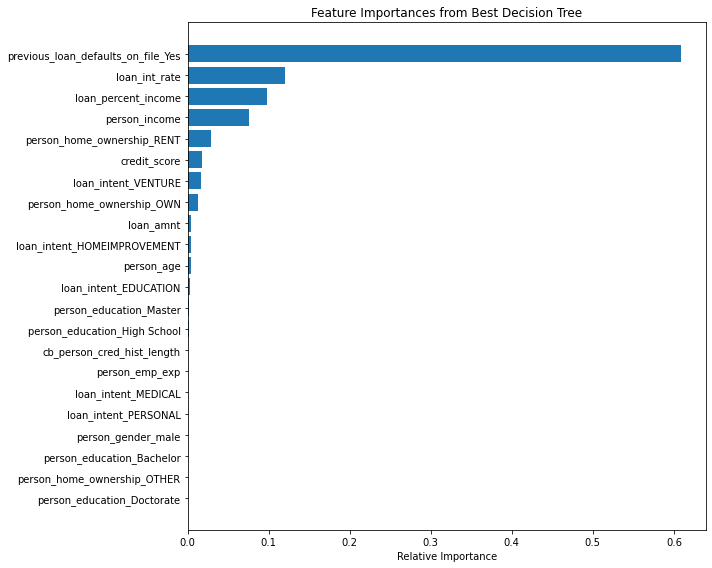

In [62]:
# plot a feature importance

# Get the fitted classifier and preprocessor from the best estimator
fitted_classifier = best_dt.named_steps['classifier']
fitted_preprocessor = best_dt.named_steps['preprocessor']

# Get transformed feature names
cat_features = fitted_preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat)
all_features = np.concatenate([cat_features, num])

# Plot feature importances
importances = fitted_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Feature Importances from Best Decision Tree")
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(np.arange(len(importances)), all_features[indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [64]:

# let's try out random forest

pipe.set_params(classifier=RandomForestClassifier(random_state=42))


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int',
                                                                                 sparse=False))]),
                                                  ['person_gender',
                                                   'person_education',
                                                   'person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 10],
    'classifier__min_samples_leaf': [1, 3],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(pipe, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print(f'Best Parameters: {grid_search_rf.best_params_}')
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred)}')


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Training Accuracy: 0.917125
Testing Accuracy: 0.89625


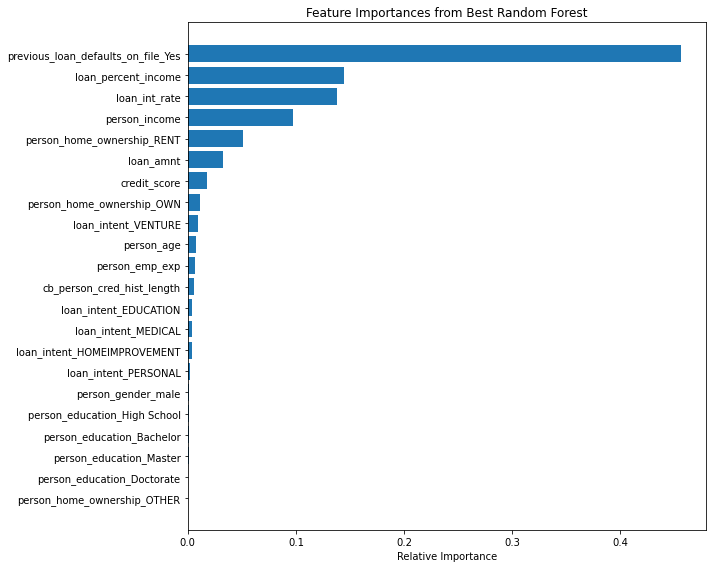

In [67]:
# plot a feature importance

# Get the fitted classifier and preprocessor from the best estimator
fitted_classifier = best_rf.named_steps['classifier']
fitted_preprocessor = best_rf.named_steps['preprocessor']

# Get transformed feature names
cat_features = fitted_preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat)
all_features = np.concatenate([cat_features, num])

# Plot feature importances
importances = fitted_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Feature Importances from Best Random Forest")
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(np.arange(len(importances)), all_features[indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()